In [1]:
begin
	using LinearAlgebra
	using StatsKit
	using AlgebraOfGraphics, GLMakie
	using Gadfly
end

# 2. Statistical Learning

## 2.1 What Is Statistical Learning ?

### FIGURE 2.1.

In [31]:
adv_df = CSV.File("../data-islr/Advertising.csv") |> DataFrame;

In [32]:
first(adv_df, 5)

,Column1,TV,radio,newspaper,sales
,Int64,Float64,Float64,Float64,Float64
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9


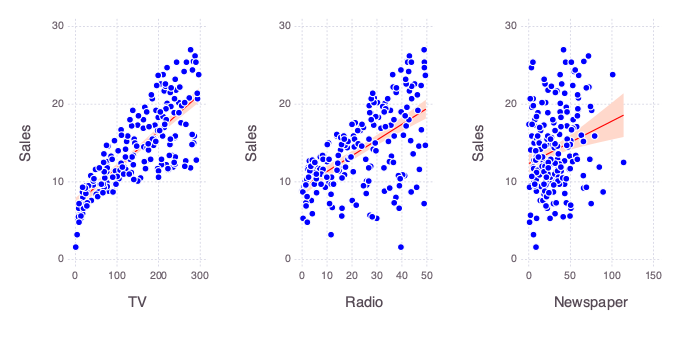

In [7]:
begin
	set_default_plot_size(18cm, 9cm)
	p1 = Gadfly.plot(
		adv_df, x="TV", y="sales", 
		layer(Geom.point, color=[colorant"blue"]), 
		layer(
			Stat.smooth(method=:lm, levels=[0.95]), 
			Geom.line, Geom.ribbon, color=[colorant"red"]),
		Guide.xlabel("TV"), Guide.ylabel("Sales")
	)
	p2 = Gadfly.plot(
		adv_df, x="radio", y="sales", 
		layer(Geom.point, color=[colorant"blue"]), 
		layer(
			Stat.smooth(method=:lm, levels=[0.95]), 
			Geom.line, Geom.ribbon, color=[colorant"red"]),
		Guide.xlabel("Radio"), Guide.ylabel("Sales")
	)
	p3 = Gadfly.plot(
		adv_df, x="newspaper", y="sales",
		layer(Geom.point, color=[colorant"blue"]), 
		layer(
			Stat.smooth(method=:lm, levels=[0.95]), 
			Geom.line, Geom.ribbon, color=[colorant"red"]),
		Guide.xlabel("Newspaper"), Guide.ylabel("Sales")
	)
	
	hstack(p1, p2, p3)
end

### FIGURE 2.2.

In [4]:
income_df = CSV.File("../data-islr/Income1.csv") |> DataFrame;

In [5]:
first(income_df, 5)

,Column1,Education,Income
,Int64,Float64,Float64
1,1,10.0,26.6588
2,2,10.4013,27.3064
3,3,10.8428,22.1324
4,4,11.2441,21.1698
5,5,11.6455,15.1926


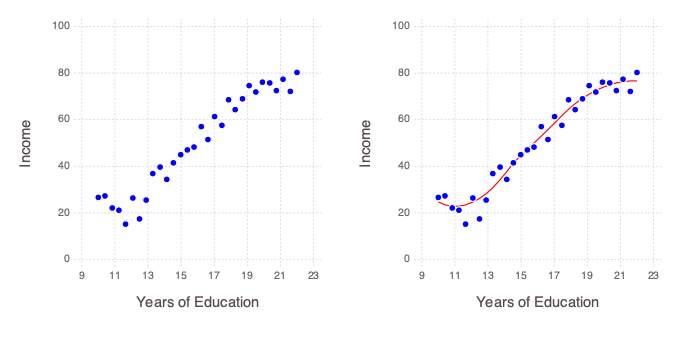

In [6]:
begin
	set_default_plot_size(18cm, 9cm)
	xmin = minimum(income_df.Education)-1
	xmax = maximum(income_df.Education)+1
	g1 = Gadfly.plot(
			income_df, x="Education", y="Income", 
			layer(Geom.point, color=[colorant"blue"]),
			Guide.xlabel("Years of Education"), Guide.ylabel("Income"),
			Guide.xticks(ticks=xmin:2:xmax)
		)
	g2 = Gadfly.plot(
			income_df, x="Education", y="Income", 
			layer(Geom.point, color=[colorant"blue"]), 
			layer(
				Stat.smooth(method=:loess, levels=[0.95]), 
				Geom.line, color=[colorant"red"]),
			Guide.xlabel("Years of Education"), Guide.ylabel("Income"),
			Guide.xticks(ticks=xmin:2:xmax)
		)
	hstack(g1, g2)
end